# Apple Stock Price Prediction 

# Core Concepts
#### 1. Time Series Data: Data points collected sequentially over time (e.g., hourly, daily, monthly). 
#### 2. Forecasting Goal: Predict future values based on past observations, 
#### - identifying patterns like trends (up/down movement) and seasonality (repeating cycles). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\abhis\OneDrive\Desktop\Data Science Project\Stock Price Analysis\P625 Stock Price DATASET.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [4]:
df.shape

(2011, 7)

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [8]:
df.corr(numeric_only = True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

Date         2011
Open         1909
High         1900
Low          1905
Close        1912
Adj Close    1983
Volume       2006
dtype: int64

In [12]:
df.set_index('Date',inplace=True)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400


# STEP 1: Exploratory Data Analysis(EDA)

<Axes: xlabel='Date'>

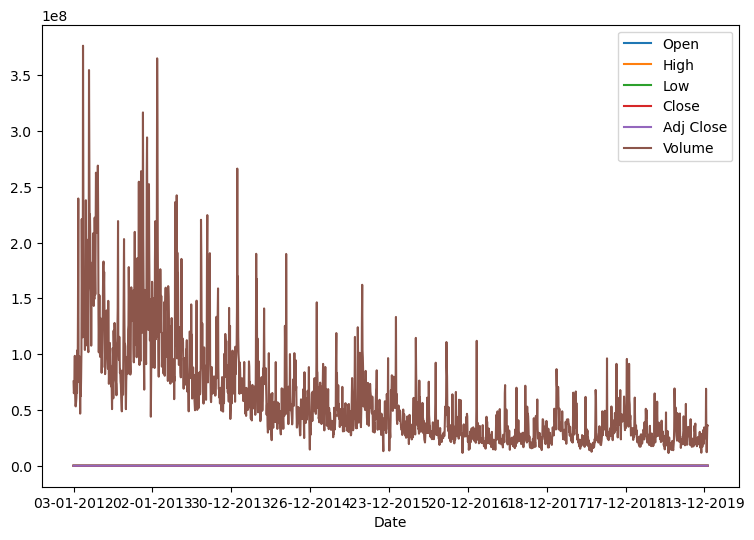

In [13]:
df.plot(figsize=(9,6))

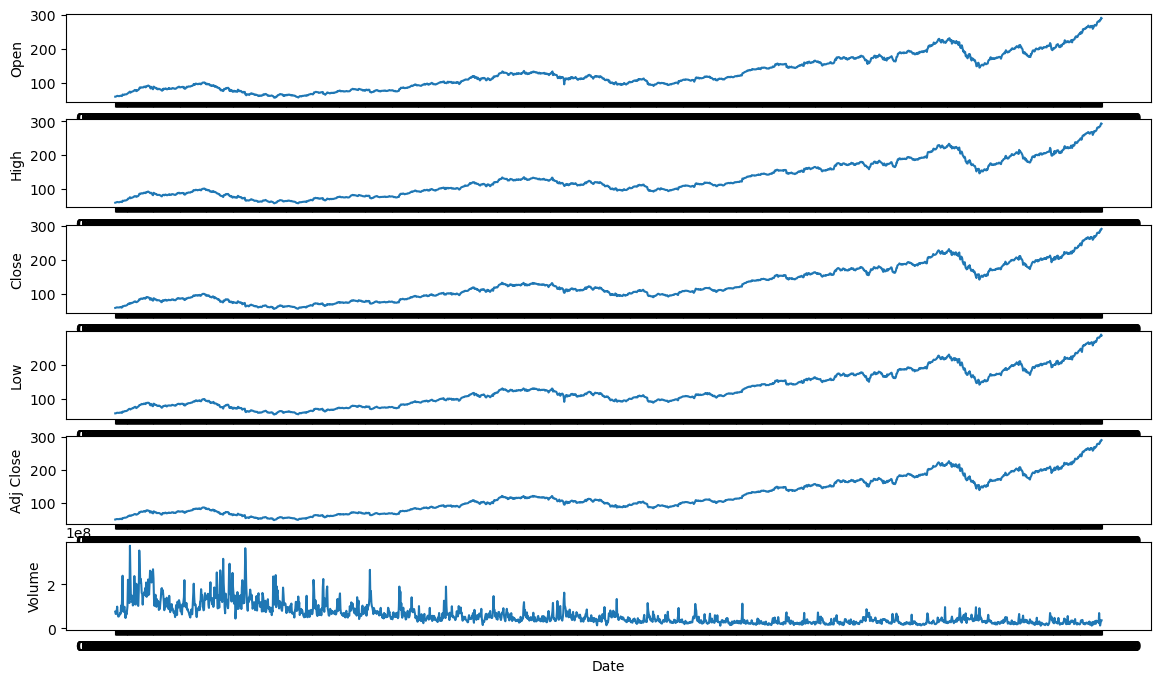

In [14]:

plt.figure(figsize = (14,8))
plt.subplot(6, 1, 1)
sns.lineplot(data = df ,x = 'Date' ,y = 'Open')

plt.subplot(6, 1, 2)
sns.lineplot(data = df ,x = 'Date' ,y = 'High')

plt.subplot(6, 1, 3)
sns.lineplot(data = df ,x = 'Date' ,y = 'Close')

plt.subplot(6, 1, 4)
sns.lineplot(data = df ,x = 'Date' ,y = 'Low')

plt.subplot(6, 1, 5)
sns.lineplot(data = df ,x = 'Date' ,y = 'Adj Close')

plt.subplot(6, 1, 6)
sns.lineplot(data = df ,x = 'Date' ,y = 'Volume')
plt.show()

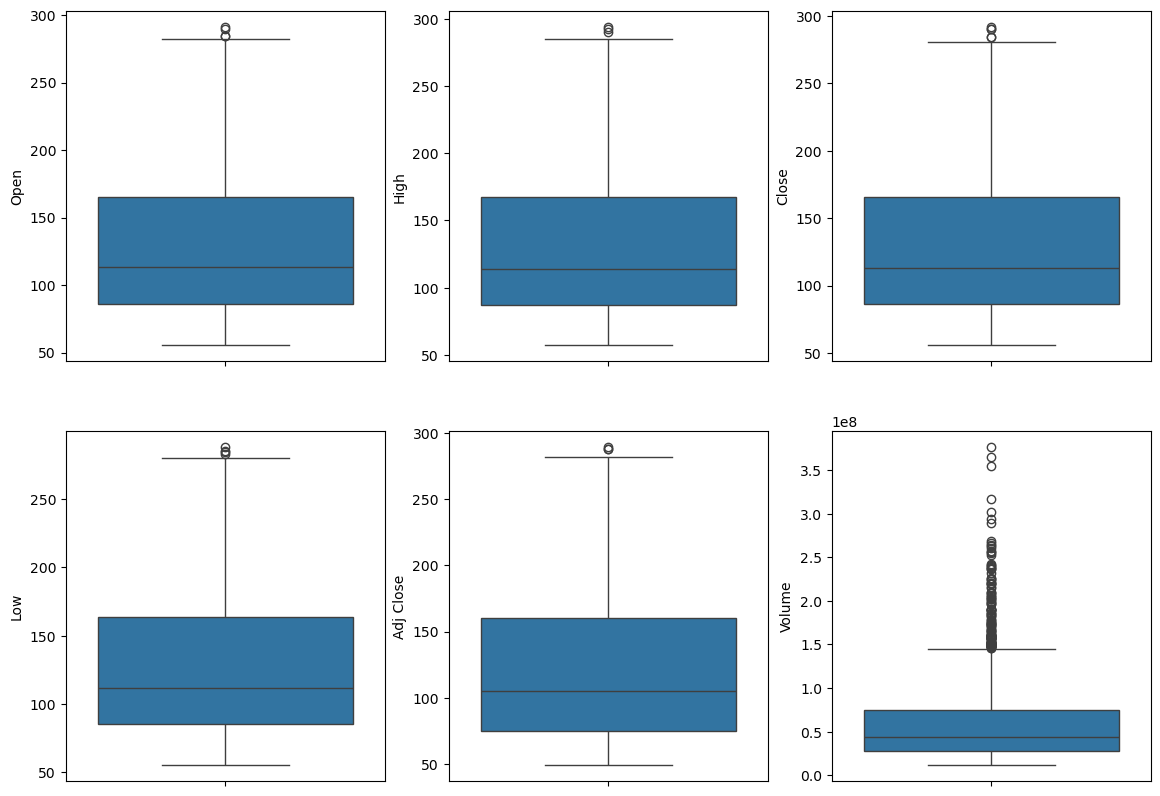

In [15]:
plt.figure(figsize = (14,10))
plt.subplot(2, 3, 1)
sns.boxplot(data = df ,y = 'Open')

plt.subplot(2, 3, 2)
sns.boxplot(data = df ,y = 'High')

plt.subplot(2, 3, 3)
sns.boxplot(data = df ,y = 'Close')

plt.subplot(2, 3, 4)
sns.boxplot(data = df ,y = 'Low')

plt.subplot(2, 3, 5)
sns.boxplot(data = df ,y = 'Adj Close')

plt.subplot(2, 3, 6)
sns.boxplot(data = df ,y = 'Volume')
plt.show()

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
Q1 = df['Open'].quantile(0.25)
Q1

np.float64(85.8828585)

In [18]:
Q1 = np.percentile(df['Open'],25)
Q1

np.float64(85.8828585)

In [19]:
df['Open'].max()

291.119995

In [20]:
df['Open'].min()

55.424286

In [21]:
# Display the first few rows
print("Initial Data Shape:", df.shape)

# Detect numerical columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# IQR-based outlier removal
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
# Count before filtering
    before = df.shape[0]
    
    # Remove outliers
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    
# Count after filtering
    after = df.shape[0]
    removed = before - after
    print(f"{col}: Removed {removed} outliers")

print("\nFinal Data Shape after Outlier Removal:", df.shape)

Initial Data Shape: (2011, 6)
Open: Removed 4 outliers
High: Removed 0 outliers
Low: Removed 1 outliers
Close: Removed 0 outliers
Adj Close: Removed 0 outliers
Volume: Removed 127 outliers

Final Data Shape after Outlier Removal: (1879, 6)


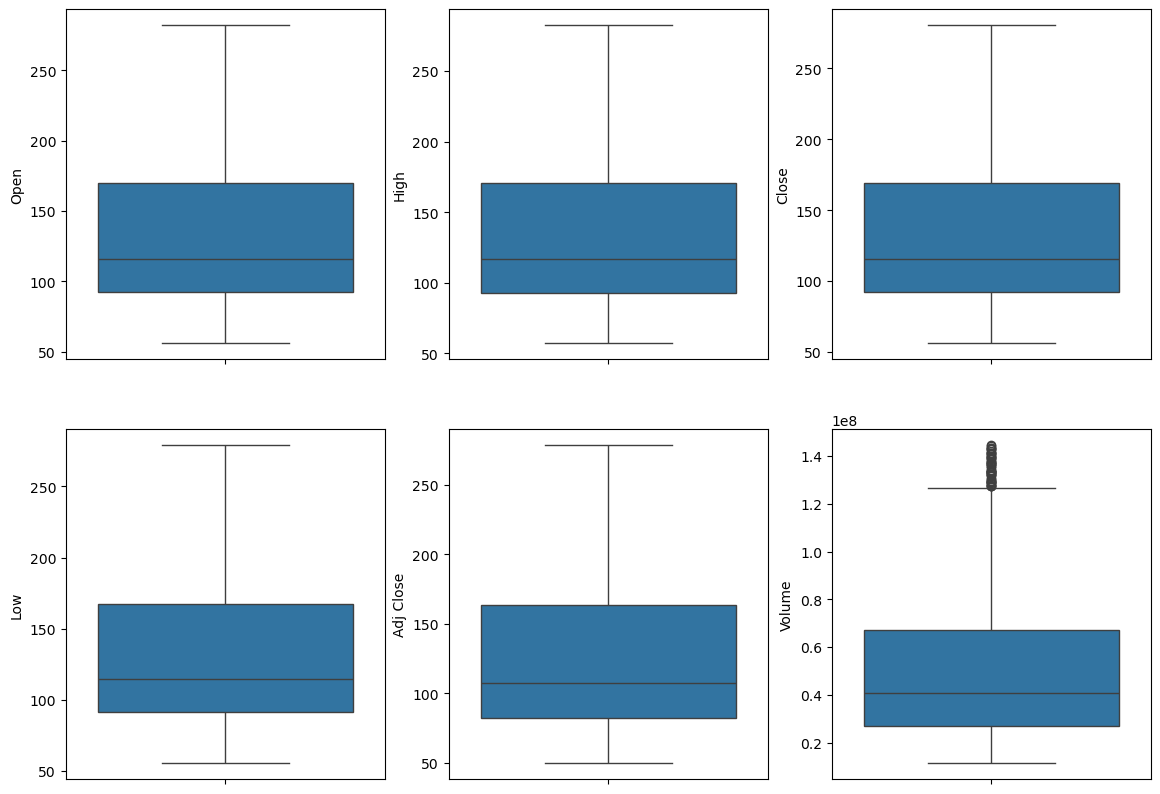

In [22]:
plt.figure(figsize = (14,10))
plt.subplot(2, 3, 1)
sns.boxplot(data = df ,y = 'Open')

plt.subplot(2, 3, 2)
sns.boxplot(data = df ,y = 'High')

plt.subplot(2, 3, 3)
sns.boxplot(data = df ,y = 'Close')

plt.subplot(2, 3, 4)
sns.boxplot(data = df ,y = 'Low')

plt.subplot(2, 3, 5)
sns.boxplot(data = df ,y = 'Adj Close')

plt.subplot(2, 3, 6)
sns.boxplot(data = df ,y = 'Volume')
plt.show()

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
16-12-2019,277.000000,280.790009,276.980011,279.859985,277.942474,32046500
17-12-2019,279.570007,281.769989,278.799988,280.410004,278.488770,28539600
18-12-2019,279.799988,281.899994,279.119995,279.739990,277.823334,29007100


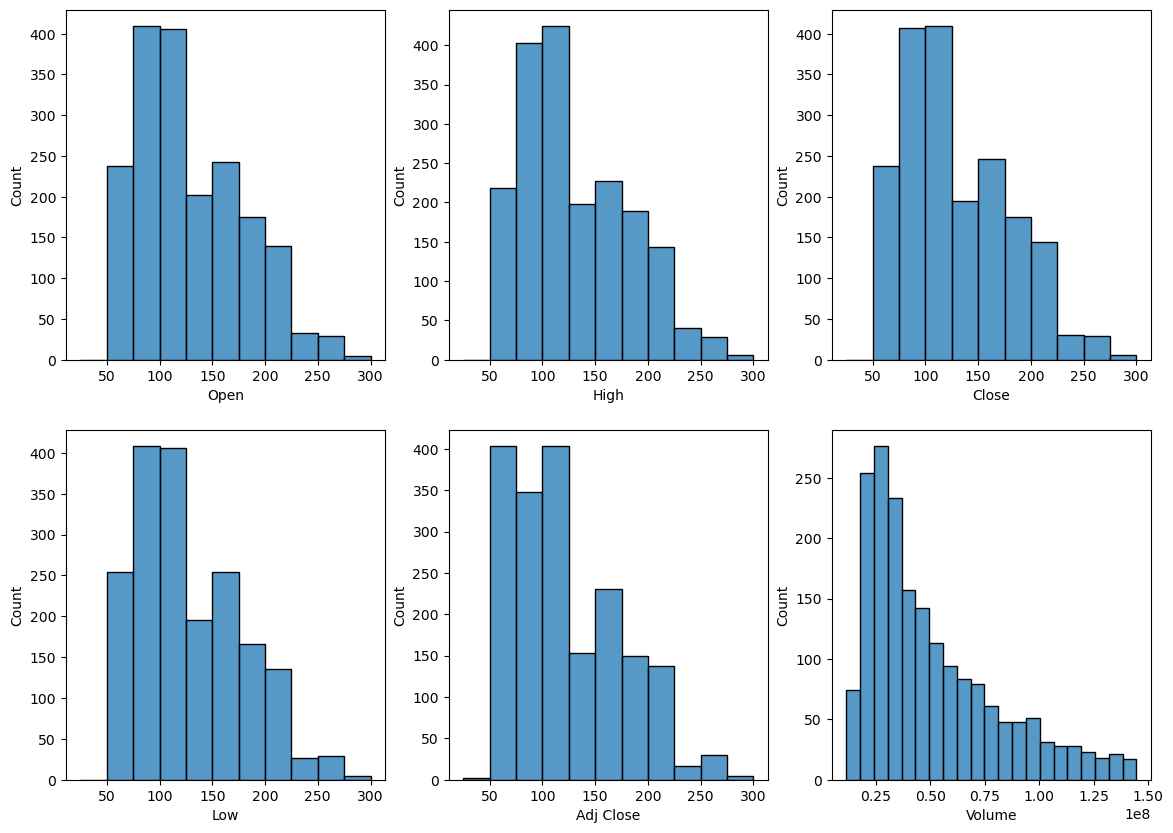

In [24]:
plt.figure(figsize = (14,10))
plt.subplot(2, 3, 1)
sns.histplot(data = df ,x = 'Open',bins = [25,50,75,100,125,150,175,200,225,250,275,300])

plt.subplot(2, 3, 2)
sns.histplot(data = df ,x = 'High',bins = [25,50,75,100,125,150,175,200,225,250,275,300])

plt.subplot(2, 3, 3)
sns.histplot(data = df ,x = 'Close',bins = [25,50,75,100,125,150,175,200,225,250,275,300])

plt.subplot(2, 3, 4)
sns.histplot(data = df ,x = 'Low',bins = [25,50,75,100,125,150,175,200,225,250,275,300])

plt.subplot(2, 3, 5)
sns.histplot(data = df ,x = 'Adj Close',bins = [25,50,75,100,125,150,175,200,225,250,275,300])

plt.subplot(2, 3, 6)
sns.histplot(data = df ,x = 'Volume')
plt.show()

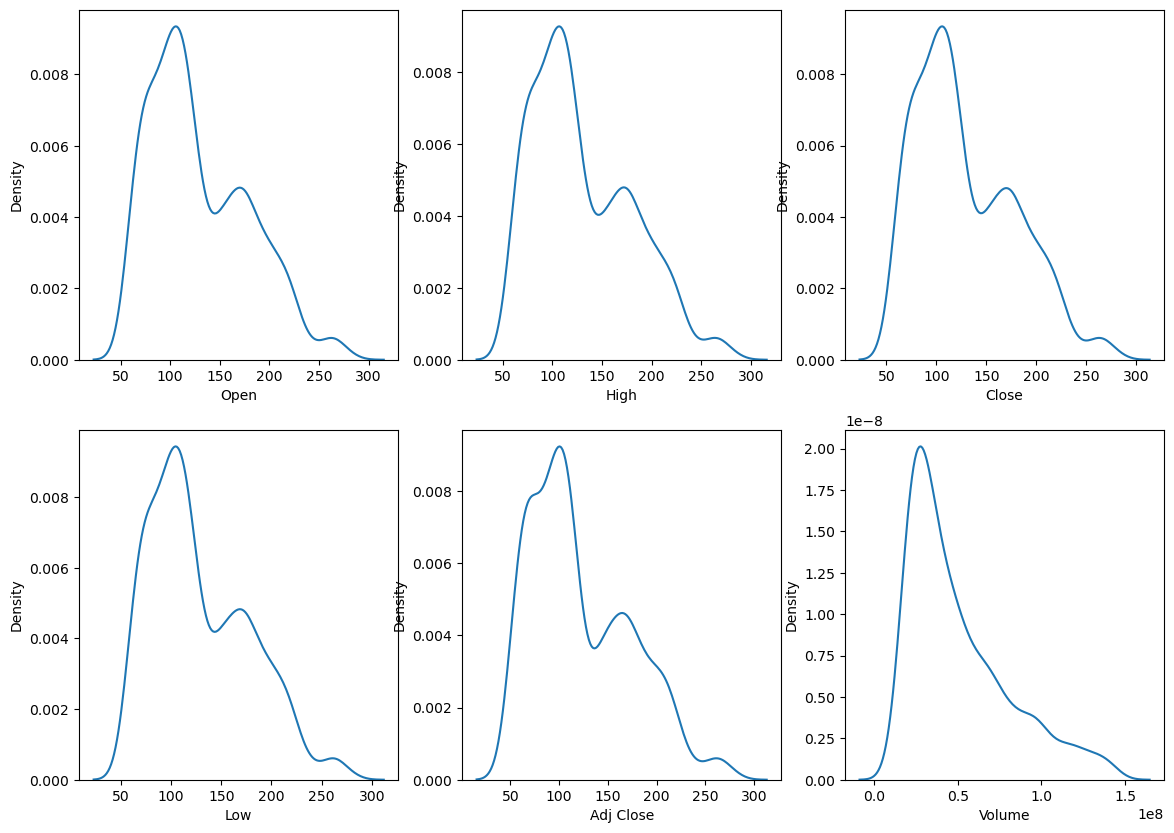

In [25]:
plt.figure(figsize = (14,10))
plt.subplot(2, 3, 1)
sns.kdeplot(df['Open'])

plt.subplot(2, 3, 2)
sns.kdeplot(df['High'])

plt.subplot(2, 3, 3)
sns.kdeplot(df['Close'])

plt.subplot(2, 3, 4)
sns.kdeplot(df['Low'])

plt.subplot(2, 3, 5)
sns.kdeplot(df['Adj Close'])

plt.subplot(2, 3, 6)
sns.kdeplot(df['Volume'])
plt.show()

In [26]:
df['Open'].skew()

np.float64(0.6679807432870624)

In [27]:
df['Open'].kurtosis()

np.float64(-0.34835872110321375)

<Axes: >

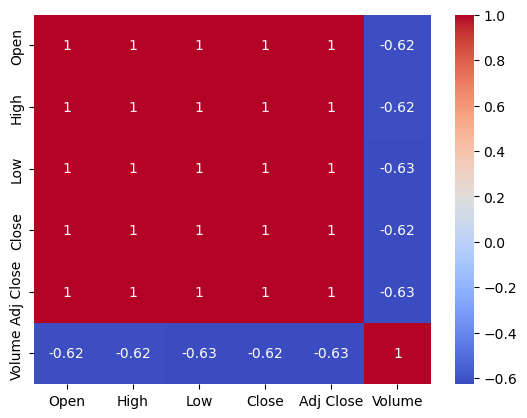

In [28]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")

# Step 2: Feature Engineering

In [29]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [30]:
df['Volatility'] = df['Close'].rolling(window=20).std()

In [31]:
df['Daily_Return'] = df['Close'].pct_change()

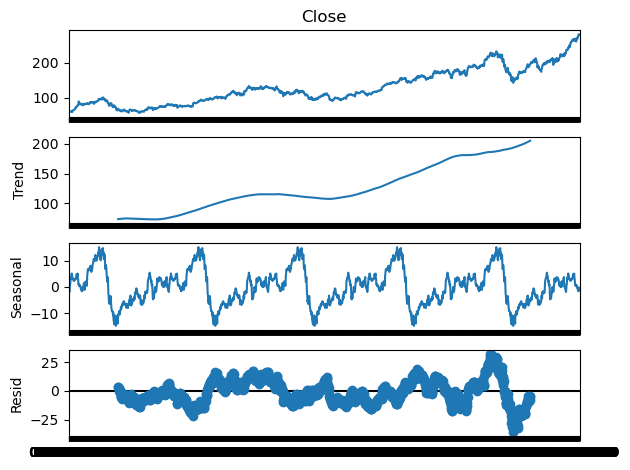

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=365)

decompose.plot()
plt.show()

# Step 3: Train or Build Model

In [33]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Close'])

print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags",dftest[2])
print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical values:")
for key, val in dftest[4].items():
      print("\t",key,":",val)

1. ADF : 0.8530604319404594
2. P-value: 0.9924461341921569
3. Num of Lags 8
4. Num of Observation used for ADF Regression and Critical Values Calculation: 1870
5. Critical values:
	 1% : -3.433851764270508
	 5% : -2.863086831883029
	 10% : -2.5675934770796993


In [34]:
from statsmodels.tsa.stattools import kpss

dftest1 = kpss(df['Close'],regression = "ct")

print("1. KPSS :",dftest1[0])
print("2. P-value:",dftest1[1])
print("3. Num of Lags",dftest1[2])
print("4. Critical values:")
for key, val in dftest1[3].items():
      print("\t",key,":",val)

1. KPSS : 0.5933678010553418
2. P-value: 0.01
3. Num of Lags 27
4. Critical values:
	 10% : 0.119
	 5% : 0.146
	 2.5% : 0.176
	 1% : 0.216


C:\Users\abhis\AppData\Local\Temp\ipykernel_4964\2804005049.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  dftest1 = kpss(df['Close'],regression = "ct")


In [35]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Open'])

print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags",dftest[2])
print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical values:")
for key, val in dftest[4].items():
      print("\t",key,":",val)

1. ADF : 0.9383096470177
2. P-value: 0.9935704544248354
3. Num of Lags 6
4. Num of Observation used for ADF Regression and Critical Values Calculation: 1872
5. Critical values:
	 1% : -3.4338480179204556
	 5% : -2.863085177979608
	 10% : -2.567592596439203


In [36]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['High'])

print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags",dftest[2])
print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical values:")
for key, val in dftest[4].items():
      print("\t",key,":",val)

1. ADF : 1.1736598749998426
2. P-value: 0.9957987484926456
3. Num of Lags 2
4. Num of Observation used for ADF Regression and Critical Values Calculation: 1876
5. Critical values:
	 1% : -3.4338405492171575
	 5% : -2.8630818807604768
	 10% : -2.5675908407967776


In [37]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Low'])

print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags",dftest[2])
print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical values:")
for key, val in dftest[4].items():
      print("\t",key,":",val)

1. ADF : 0.48544996044869404
2. P-value: 0.9844240854720875
3. Num of Lags 19
4. Num of Observation used for ADF Regression and Critical Values Calculation: 1859
5. Critical values:
	 1% : -3.4338725134861083
	 5% : -2.863095992014326
	 10% : -2.5675983545064196


In [38]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Adj Close'])

print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags",dftest[2])
print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical values:")
for key, val in dftest[4].items():
      print("\t",key,":",val)

1. ADF : 1.079265479795656
2. P-value: 0.9950357185865162
3. Num of Lags 8
4. Num of Observation used for ADF Regression and Critical Values Calculation: 1870
5. Critical values:
	 1% : -3.433851764270508
	 5% : -2.863086831883029
	 10% : -2.5675934770796993


In [39]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Volume'])

print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags",dftest[2])
print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical values:")
for key, val in dftest[4].items():
      print("\t",key,":",val)

1. ADF : -2.128943561665881
2. P-value: 0.23303661142265253
3. Num of Lags 24
4. Num of Observation used for ADF Regression and Critical Values Calculation: 1854
5. Critical values:
	 1% : -3.4338820264543966
	 5% : -2.8631001916718013
	 10% : -2.567600590670162


In [40]:
df_diff = df[['Open','High','Low','Close','Adj Close','Volume']].diff()
df_diff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03-01-2012,NaN,NaN,NaN,NaN,NaN,NaN
04-01-2012,0.085716,0.311432,0.040001,0.315716,0.272827,-10549700.0
05-01-2012,0.707142,0.552856,0.484287,0.655712,0.566639,2811900.0
06-01-2012,0.688572,0.599999,0.935715,0.624286,0.539455,11755800.0
09-01-2012,0.818569,0.714286,0.304283,-0.095714,-0.082698,18932900.0
...,...,...,...,...,...,...
16-12-2019,5.540009,5.490021,6.050018,4.709991,4.677703,-1350400.0
17-12-2019,2.570007,0.979980,1.819977,0.550019,0.546296,-3506900.0
18-12-2019,0.229981,0.130005,0.320007,-0.670014,-0.665436,467500.0


In [41]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_diff['Open'].dropna())  # Close, High, Low

print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags",dftest[2])
print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical values:")
for key, val in dftest[4].items():
      print("\t",key,":",val)

1. ADF : -12.257662102120518
2. P-value: 9.231171416927793e-23
3. Num of Lags 9
4. Num of Observation used for ADF Regression and Critical Values Calculation: 1868
5. Critical values:
	 1% : -3.4338555186538002
	 5% : -2.8630884893308153
	 10% : -2.567594359607775


In [42]:
9.231171416927793e-23<=0.05

True

In [43]:
df_diff.dropna(inplace=True)

In [44]:
df_diff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
04-01-2012,0.085716,0.311432,0.040001,0.315716,0.272827,-10549700.0
05-01-2012,0.707142,0.552856,0.484287,0.655712,0.566639,2811900.0
06-01-2012,0.688572,0.599999,0.935715,0.624286,0.539455,11755800.0
09-01-2012,0.818569,0.714286,0.304283,-0.095714,-0.082698,18932900.0
10-01-2012,0.058571,-0.250000,0.021431,0.215713,0.186401,-33957000.0
...,...,...,...,...,...,...
16-12-2019,5.540009,5.490021,6.050018,4.709991,4.677703,-1350400.0
17-12-2019,2.570007,0.979980,1.819977,0.550019,0.546296,-3506900.0
18-12-2019,0.229981,0.130005,0.320007,-0.670014,-0.665436,467500.0


In [45]:
train = df_diff[:-30]
test = df_diff[-30:]

In [46]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit=auto_arima(df['Close'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8260.891, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8259.455, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8261.219, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8261.193, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8262.908, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8260.396, Time=1.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.120 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1879
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4127.727
Date:                Sat, 03 Jan 2026   AIC                           8259.455
Time:                        21:38:47   BIC                           8270.531
Sample:                             0   HQIC                          8263.535
                               - 1879                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1175      0.051      2.314      0.021       0.018       0.217
sigma2         4.7493      0.077     62.023      0.000       4.599       4.899
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              3215.30
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               5.04   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# AR MODEL

In [47]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
08-11-2019,-0.049988,0.089996,-1.259979,0.710022,0.705169,-6238500.0
11-11-2019,-0.390014,2.029999,1.429993,2.059997,2.045868,2958700.0
12-11-2019,3.250000,0.320008,2.640014,-0.240021,-0.238372,1391900.0
13-11-2019,-0.419983,1.989990,0.149994,2.510010,2.492828,3836400.0
14-11-2019,2.619995,0.100006,1.029999,-1.829986,-1.817474,-3387900.0
15-11-2019,-0.070007,0.899994,0.910004,3.119995,3.098632,2755900.0
18-11-2019,2.119995,1.649994,1.220001,1.339996,1.330841,-3375800.0
19-11-2019,2.100006,0.570007,1.160004,-0.809997,-0.804473,-2634000.0
20-11-2019,-2.359985,-1.920013,-4.990021,-3.100007,-3.078736,7516800.0


In [48]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Use only Close price
train_data = train['Close']
test_data = test['Close']

# Build AR model
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

print(model_fit.summary())

# Forecast
# predictions = model_fit.forecast(steps=len(test_data))
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluation
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")


                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1848
Model:                    AutoReg(30)   Log Likelihood               -3965.478
Method:               Conditional MLE   S.D. of innovations              2.143
Date:                Sat, 03 Jan 2026   AIC                           7994.955
Time:                        21:38:47   BIC                           8171.131
Sample:                            30   HQIC                          8059.956
                                 1848                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0842      0.051      1.636      0.102      -0.017       0.185
Close.L1       0.0247      0.023      1.054      0.292      -0.021       0.071
Close.L2      -0.0613      0.023     -2.614      0.0

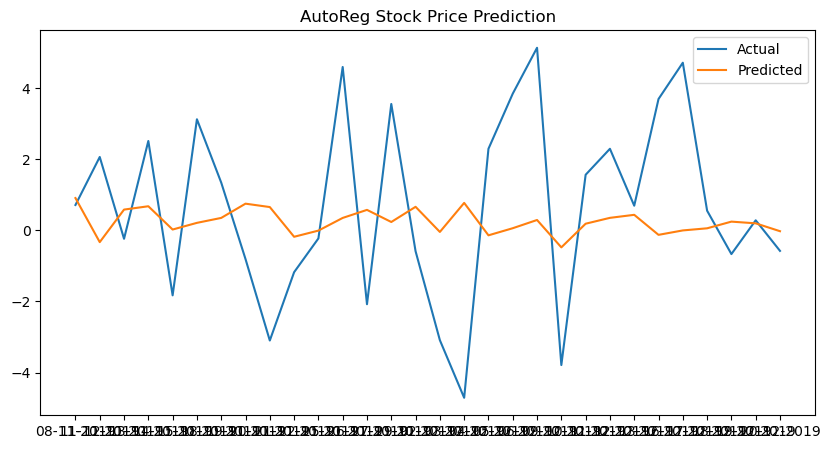

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="Actual")
plt.plot(test_data.index, predictions, label="Predicted")
plt.legend()
plt.title("AutoReg Stock Price Prediction")
plt.show()


# MA MODEL

In [50]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Use only Close price
train_data = train['Close']
test_data = test['Close']

# 'train_data' should be a pandas Series or DataFrame
# MA(5) model → ARIMA(p=0, d=0, q=5)
model = ARIMA(train_data, order=(0, 0, 5))
model_fit = model.fit()

print(model_fit.summary())

predictions = model_fit.forecast(steps=len(test_data))


# predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1848
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -4050.638
Date:                Sat, 03 Jan 2026   AIC                           8115.277
Time:                        21:38:49   BIC                           8153.930
Sample:                             0   HQIC                          8129.526
                               - 1848                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1087      0.052      2.107      0.035       0.008       0.210
ma.L1          0.0099      0.016      0.612      0.541      -0.022       0.042
ma.L2         -0.0528      0.017     -3.084      0.0

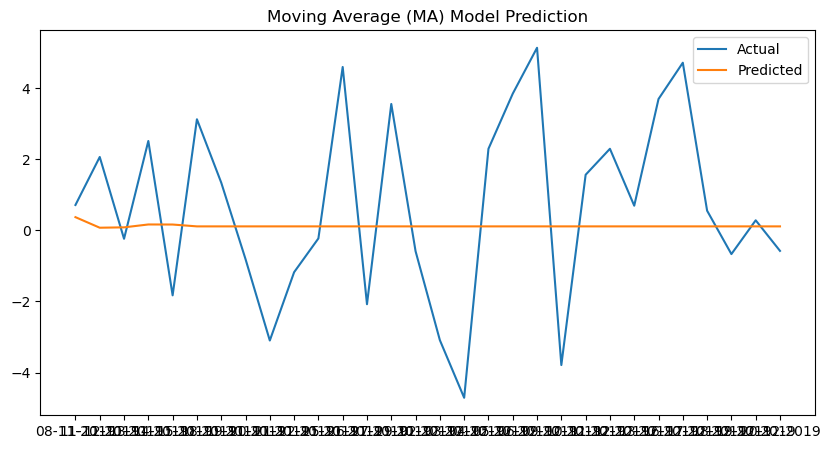

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="Actual")
plt.plot(test_data.index, predictions, label="Predicted")
plt.legend()
plt.title("Moving Average (MA) Model Prediction")
plt.show()


# ARMA MODEL

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_data = train['Close']
test_data = test['Close']

model = ARIMA(train_data, order=(2, 0, 2))
model_fit = model.fit()

print(model_fit.summary())

predictions = model_fit.forecast(steps=len(test_data))


rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")

# start=len(train)
# end=len(train)+len(test)-1
# pred=model_fit.predict(start=start,end=end,typ='levels')
# print(pred)
# pred.index=df.index[start:end+1]
# print(pred)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1848
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4051.666
Date:                Sat, 03 Jan 2026   AIC                           8115.333
Time:                        21:38:53   BIC                           8148.464
Sample:                             0   HQIC                          8127.546
                               - 1848                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1085      0.049      2.195      0.028       0.012       0.205
ar.L1          0.3077      0.256      1.200      0.230      -0.195       0.810
ar.L2         -0.3213      0.261     -1.231      0.2

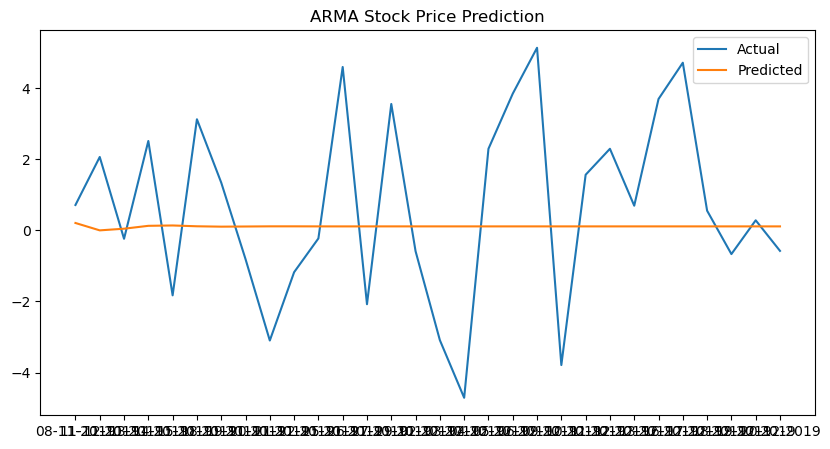

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="Actual")
plt.plot(test_data.index, predictions, label="Predicted")
plt.legend()
plt.title("ARMA Stock Price Prediction")
plt.show()


# ARIMA MODEL

Figure(640x480)
Figure(640x480)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1848
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4054.232
Date:                Sat, 03 Jan 2026   AIC                           8118.465
Time:                        21:38:58   BIC                           8146.071
Sample:                             0   HQIC                          8128.642
                               - 1848                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8641      0.084    -10.299      0.000      -1.029      -0.700
ar.L2         -0.0155      0.016     -0.947      0.344      -0.048       0.017
ma.L1         -0.122

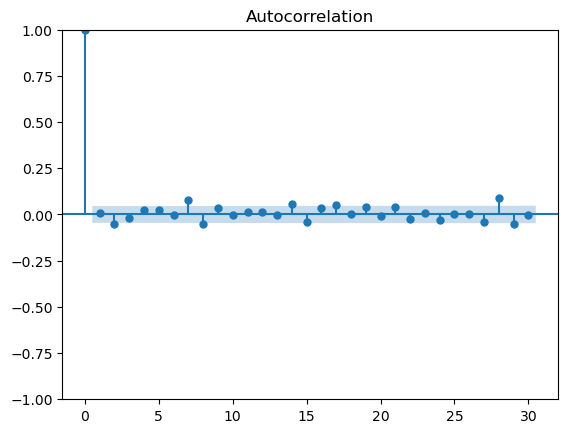

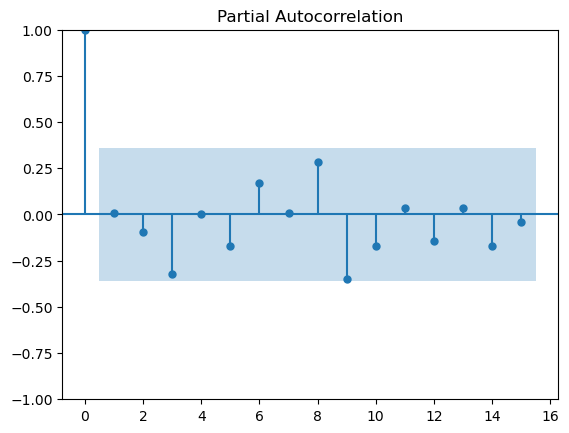

In [54]:
# Model 1: ARIMA (Statistical Model)

from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

train_data = train['Close']
test_data = test['Close']

print(plot_acf(train_data, lags=30))
print(plot_pacf(test_data, lags=15))

arima_model = ARIMA(train_data, order=(2, 1, 2))
arima_fit = arima_model.fit()

print(arima_fit.summary())

arima_pred = arima_fit.forecast(steps=len(test_data))


rmse = np.sqrt(mean_squared_error(test_data, arima_pred))
mae = mean_absolute_error(test_data, arima_pred)

print("ARIMA RMSE:", rmse)
print("ARIMA MAE:", mae)



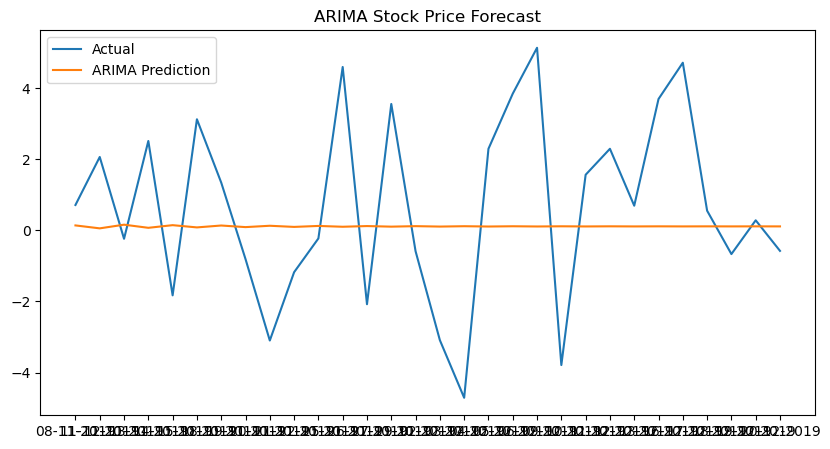

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="Actual")
plt.plot(test_data.index, arima_pred, label="ARIMA Prediction")
plt.legend()
plt.title("ARIMA Stock Price Forecast")
plt.show()


# SARIMA MODEL

In [56]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import numpy as np
# from sklearn.metrics import mean_squared_error, mean_absolute_error


# train_data = train['Close']
# test_data = test['Close']

# sarima_model = SARIMAX(
#     train_data,
#     order=(2, 1, 2),
#     seasonal_order=(1, 1, 1, 252)
# )

# sarima_fit = sarima_model.fit()
# print(sarima_fit.summary())

# sarima_pred = sarima_fit.forecast(steps=len(test_data))


# rmse = np.sqrt(mean_squared_error(test_data, sarima_pred))
# mae = mean_absolute_error(test_data, sarima_pred)

# print("SARIMA RMSE:", rmse)
# print("SARIMA MAE:", mae)


In [57]:
# plt.figure(figsize=(10,5))
# plt.plot(test_data.index, test_data, label="Actual")
# plt.plot(test_data.index, sarima_pred, label="SARIMA Prediction")
# plt.legend()
# plt.title("SARIMA Stock Price Forecast")
# plt.show()


# CROSS-VALIDATION FOR STOCK PRICE PREDICTION
# (Finding the BEST Regression Model)

In [58]:
# 1️⃣ Why Normal K-Fold CV is WRONG for Time Series

# ❌ Random split breaks time order
# ❌ Future data leaks into past
# ❌ Unrealistic evaluation

# ❌ DO NOT USE:
# KFold(n_splits=5, shuffle=True)

In [60]:
# 2️⃣ Correct Cross-Validation for Time Series

# ✅ TimeSeriesSplit
# It respects temporal order.
#### Example:
# Train → Test
# [1 2 3] → [4]
# [1 2 3 4] → [5]
# [1 2 3 4 5] → [6]


from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

import numpy as np
from sklearn.metrics import mean_squared_error


import pandas as pd

data = df[['Close']]

def create_lag_features(data, lags=30):
    df_lag = data.copy()
    for i in range(1, lags+1):
        df_lag[f'lag_{i}'] = df_lag['Close'].shift(i)
    return df_lag.dropna()

df_lag = create_lag_features(data)

X = df_lag.drop('Close', axis=1)
y = df_lag['Close']




def time_series_cv_rmse(model, X, y, tscv):
    rmse_scores = []
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmse_scores.append(rmse)
        
    return np.mean(rmse_scores)



from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_rmse = time_series_cv_rmse(lr, X, y, tscv)
print("Linear Regression CV RMSE:", lr_rmse)



from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf_rmse = time_series_cv_rmse(rf, X, y, tscv)
print("Random Forest CV RMSE:", rf_rmse)



from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_rmse = time_series_cv_rmse(xgb, X, y, tscv)
print("XGBoost CV RMSE:", xgb_rmse)


Linear Regression CV RMSE: 2.201383573186003
Random Forest CV RMSE: 15.362444648623867
XGBoost CV RMSE: 17.058333009795053


In [61]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "CV_RMSE": [lr_rmse, rf_rmse, xgb_rmse]
})

print(results)


               Model    CV_RMSE
0  Linear Regression   2.201384
1      Random Forest  15.362445
2            XGBoost  17.058333


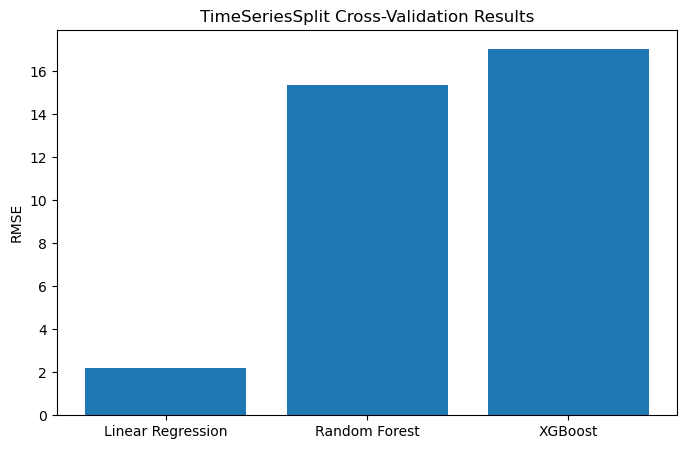

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['CV_RMSE'])
plt.ylabel("RMSE")
plt.title("TimeSeriesSplit Cross-Validation Results")
plt.show()


# LSTM

# MODEL EVALUATION

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
mae = mean_absolute_error(y_test, xgb_pred)

print("RMSE:", rmse)
print("MAE:", mae)
